# Homework 4

All code included here is my own; it was not shared or discussed with anyone else.

## Q1:

Consider the matrix 
$ A = 
\left[
\begin{array}{ccc}
2 & 5 & -3 \\
5 & 7 & 1\\
-3 & 1 & 4
\end{array}
\right] $

A) Find the characteristic polynomial for A. 

> This was done by hand on paper, using $ det(A-\lambda I) = 0$
>
> Characteristic equation: $-\lambda^3 + 13\lambda^2 -15\lambda - 139 = 0$

B) Solve the characteristic equation and find all the eigenvalues of A. (Not using any eigenvalue function)

C) Use an appropriate functino to find all the eigenvalues and corresponding eigenvectors of A.

D) Let's say that the eigenvectors are $x_i, i= 1,2,3$. Use explicit calculations to show that the eigenvectors are orthogonal.

In [28]:
import numpy as np
from numpy import linalg as la
from scipy.optimize import fsolve
import scipy.optimize as op

a = np.array([[2,5,-3],[5,7,1],[-3,1,4]])

def a_characteristic(x):
  return -x**3 + 13*x**2 - 15*x - 139

roots = fsolve(a_characteristic, [-500, 0, 500])

print('Matrix a = ') # see the matrix
print(a, '\n')

print('The solutions of the characteristic equation are (in no particular order): ')
print(roots, '\n') 

eigenvalues, eigenvectors = la.eig(a) # using linalg eigenvalue function appropriately
e1 = eigenvectors[:,0]
e2 = eigenvectors[:,1]
e3 = eigenvectors[:,2]

print('Eigenvalues from the linear algebra eigenvalue function are:')
print(eigenvalues, '\n')  
#print(eigenvectors, '\n') 

print('The corresponding eigenvectors are: ')
print('x_1: ', e1)
print('x_2: ', e2)
print('x_3: ', e3, '\n')

print('Dot products between all eigenvectors should be zero to show orthogonality.')
print(np.round(np.dot(e1, e2),12))
print(np.round(np.dot(e2, e3),12))
print(np.round(np.dot(e1, e3),12))
print('All were rounded to 12 digits.')

Matrix a = 
[[ 2  5 -3]
 [ 5  7  1]
 [-3  1  4]] 

The solutions of the characteristic equation are (in no particular order): 
[-2.54638773  5.35753413 10.1888536 ] 

Eigenvalues from the linear algebra eigenvalue function are:
[-2.54638773 10.1888536   5.35753413] 

The corresponding eigenvectors are: 
x_1:  [ 0.7816147  -0.4541654   0.42756549]
x_2:  [-0.55181616 -0.82304842  0.13449988]
x_3:  [-0.29082191  0.34106463  0.89392255] 

Dot products between all eigenvectors should be zero to show orthogonality.
0.0
0.0
0.0
All were rounded to 12 digits.


## Q2:

Consider the following system of equations for the motion of a BeCl2 molecule:

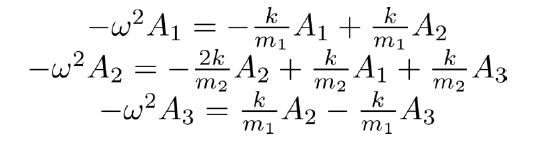

where $m_1,m_2$ are masses of Cl and Be atoms respectively and $\omega$ is the frequency of vibration of the molecule.

A) Rewrite the above as an eigenvalue problem and show that the quantity $\omega^2$ is the eigenvalue.

B) Solve for different vibrational frequencies $\omega_1, \omega_2, \omega_3$ when $k = 1.8\times10^2 kg/s^2, m_1 = 35.45\times1.6605\times10^{-27}kg, m_2 = 9.01\times1.6605\times10^{-27}kg.$

C) Find the eigenvectors corresponding to the frequencies calculated in (B).

> Equations can be rewritten in matrix form as:
>
> $\left[
\begin{array}{ccc}
k/m_1-\omega^2 & -k/m_1 & 0 \\
-k/m_2 & 2k/m_2-\omega^2 & -k/m_2\\
0 & -k/m_1 & k/m_1-\omega^2
\end{array}
\right] 
\left[
\begin{array}{c}
A_1 \\
A_2\\
A_3
\end{array}
\right] 
=
\left[
\begin{array}{c}
0 \\
0\\
0
\end{array}
\right] $ 
> 
> which shows $\omega^2$ as an eigenvalue by the definition $[A-\lambda I]X = 0$



In [12]:
k = 1.8*10**2
m1 = 35.45*1.6605*10**-27
m2 = 9.01*1.6605*10**-27

motion = np.array([[k/m1, -k/m1, 0],
                   [-k/m2, 2*k/m2, -k/m2],
                   [0, -k/m1, k/m1]])

# print(motion)
eigenvalues, eigenvectors = la.eig(motion)
e1 = eigenvectors[:,0]
e2 = eigenvectors[:,1]
e3 = eigenvectors[:,2]

eigenval_ordered = np.sort(eigenvalues)

print('The vibrational frequencies w_1, w_2, w_3 are:')
print(eigenvalues, '\n')
print('While not in ascending order, these correspond to the eigenvectors:')
print(e1)
print(e2)
print(e3)

The vibrational frequencies w_1, w_2, w_3 are:
[2.71202523e+28 3.05785851e+27 6.70470053e+11] 

While not in ascending order, these correspond to the eigenvectors:
[ 0.12507653 -0.98423154  0.12507653]
[ 7.07106781e-01  5.45393449e-16 -7.07106781e-01]
[0.57735027 0.57735027 0.57735027]


## Q3:

Three dimensional state of stress at a point is given by:

$\left[
\begin{array}{ccc}
20 & 8 & -18 \\
8 & 28 & 12\\
-18 & 12 & 4
\end{array}
\right]  MPa $

A) Find the principal stresses at the point

B) Calculate the angles that the normal to the principal plane which has the maximum principal stress makes with the x,y,z axes.

C) Calculate the angles that the normal to the principal plane which has the minimum principal stress makes with the x,y,z, axes.


In [24]:
stress = np.array([[20, 8, -18],
                   [8, 28, 12],
                   [-18, 12, 4]])

# print(stress)

pr_stress, pr_planes = la.eig(stress)

p1 = pr_planes[:,0]
p2 = pr_planes[:,1]
p3 = pr_planes[:,2]

print('The principal stresses are: ')
print(pr_stress, '\n')

p1_x = np.dot(p1,[1,0,0])
p1_y = np.dot(p1,[0,1,0])
p1_z = np.dot(p1,[0,0,1])

p3_x = np.dot(p3,[1,0,0])
p3_y = np.dot(p3,[0,1,0])
p3_z = np.dot(p3,[0,0,1])

print('Max principal stress is: ', pr_stress[2], 'MPa')
print('The corresponding principal plane is given by')
print(p3)
print('Its angle with the x axis is ', np.arccos(p3_x/(la.norm(p3))), "radians")
print('Its angle with the y axis is ', np.arccos(p3_y/(la.norm(p3))), "radians")
print('Its angle with the z axis is ', np.arccos(p3_z/(la.norm(p3))), "radians", '\n')

print('Min principal stress is: ', pr_stress[0], 'MPa')
print('The corresponding principal plane is given by')
print(p1)
print('Its angle with the x axis is ', np.arccos(p1_x/(la.norm(p3))), "radians")
print('Its angle with the y axis is ', np.arccos(p1_y/(la.norm(p3))), "radians")
print('Its angle with the z axis is ', np.arccos(p1_z/(la.norm(p3))), "radians")



The principal stresses are: 
[-12.79567553  31.67988775  33.11578778] 

Max principal stress is:  33.11578777522723 MPa
The corresponding principal plane is given by
[0.27402382 0.93697593 0.21676496]
Its angle with the x axis is  1.2932218037807954 radians
Its angle with the y axis is  0.35692416119871395 radians
Its angle with the z axis is  1.352296917303235 radians 

Min principal stress is:  -12.795675525526406 MPa
The corresponding principal plane is given by
[-0.51481828  0.33329183 -0.78985992]
Its angle with the x axis is  2.111591993269645 radians
Its angle with the y axis is  1.231003439352661 radians
Its angle with the z axis is  2.481376885716648 radians
